In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ensayo3_excel = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery\MI_coordinates.csv"

ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [25]:
ensayos_dfs = []
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])


In [26]:
# Filtrado de matrices
threshold = 0.62
porcentaje = 0.6
# Conjuntamos las matrices
stack = np.stack([df.values for df in ensayos_dfs])
# Aplicamos filtro a cada matriz
above = stack > threshold

N = len(ensayos_dfs) # = 109
count_above = above.sum(axis=0) # Contando cuantos valores superan el umbral en celda

min_requerido = int(np.ceil(porcentaje*N)) # 0.6*109 = 65.4
# con esto bastara con quedarnos con las celdas de 'above' que cumplan con min_requerido
# para así tener el número de sujetos que superan el umbral
result_bool = count_above >= min_requerido

result_df = pd.DataFrame(result_bool, 
                         index=ensayos_dfs[0].index, 
                         columns=ensayos_dfs[0].columns).astype(int)

<Axes: >

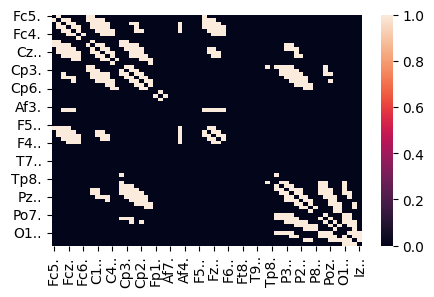

In [27]:
plt.figure(figsize=(5, 3))

sns.heatmap(result_df)

# Generar estadísticos para decidir umbrales 

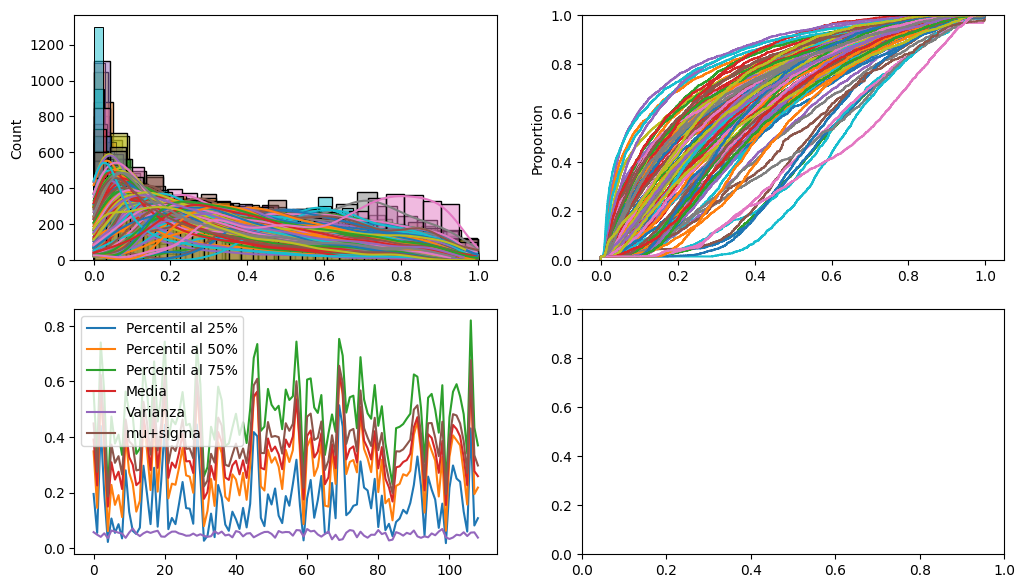

In [28]:
ensayos_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()


In [29]:
from scipy import stats
stats.median_abs_deviation(th25)

np.float64(0.06955915283857339)

In [30]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_

In [31]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])
    estadisticos_df[columna] = [d1, d2, d3, d4]

In [32]:
estadisticos_df

,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.676548
mediana,0.144574,0.273808,0.484181,0.327700,0.389466
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.060276
